In [19]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings  # Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [20]:
# Load datasets
user_data = pd.read_csv('Users.csv')
book_data = pd.read_csv('Books.csv')
rating_data = pd.read_csv('Ratings.csv')

In [21]:
# Display the first few rows of each dataset
print("Users Data Sample:")
print(user_data.head())
print("\nBooks Data Sample:")
print(book_data.head())
print("\nRatings Data Sample:")
print(rating_data.head())

Users Data Sample:
   User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

Books Data Sample:
         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2        

In [22]:
# Display dataset dimensions
print(f"Dataset Shapes:\n  Books: {book_data.shape}\n  Ratings: {rating_data.shape}\n  Users: {user_data.shape}")

Dataset Shapes:
  Books: (271360, 8)
  Ratings: (1149780, 3)
  Users: (278858, 3)


In [23]:
# Function to analyze missing values in a DataFrame
def missing_values(dataframe):
    missing_count = dataframe.isnull().sum()
    missing_percentage = round(dataframe.isnull().mean() * 100, 2)
    summary = pd.DataFrame({
        'Column': dataframe.columns,
        'Missing Values': missing_count,
        '% of Total Values': missing_percentage,
        'Data Type': dataframe.dtypes
    }).sort_values('% of Total Values', ascending=False)
    return summary

In [29]:
# Analyze missing values in the Users dataset
missing_users = missing_values(user_data)
print("\nMissing Values in Users Dataset:")
print(missing_users)


Missing Values in Users Dataset:
            Column  Missing Values  % of Total Values Data Type
Age            Age          110762              39.72   float64
User-ID    User-ID               0               0.00     int64
Location  Location               0               0.00    object


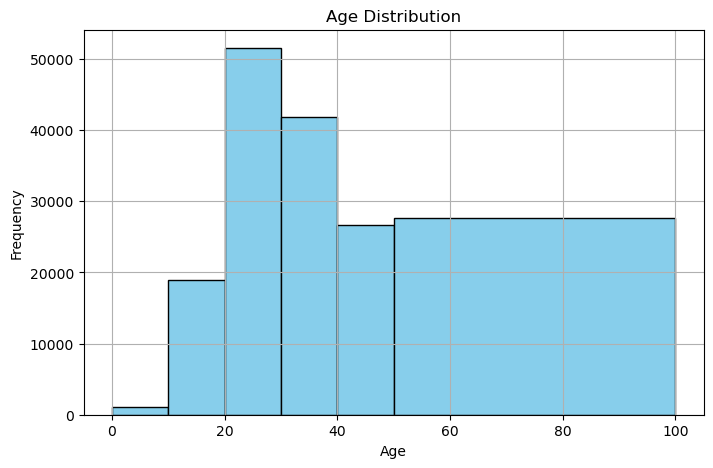

In [31]:
# Visualizing age distribution
plt.figure(figsize=(8, 5))
user_data['Age'].hist(bins=[0, 10, 20, 30, 40, 50, 100], color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

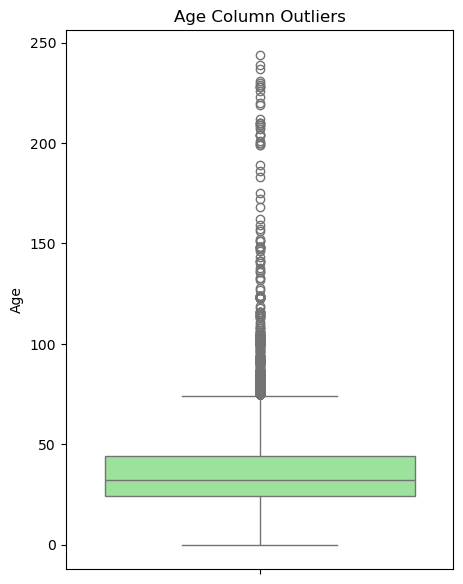

In [33]:
# Boxplot to detect outliers in the Age column
plt.figure(figsize=(5, 7))
sns.boxplot(y=user_data['Age'], color='lightgreen')
plt.title('Age Column Outliers')
plt.show()

In [35]:
# Check unique values in the Location column
print("\nUnique Locations:")
print(user_data['Location'].nunique())


Unique Locations:
57339


In [37]:
# Extract Country information from Location
user_data['Country'] = user_data['Location'].str.extract(r',\s?(\w*\s?\w*)"*$')

In [39]:
# Drop the Location column as it is no longer needed
user_data.drop(columns=['Location'], inplace=True)

In [41]:
# Preview modified Users dataset
print("\nModified Users Data Sample:")
print(user_data.head(2))


Modified Users Data Sample:
   User-ID   Age Country
0        1   NaN     usa
1        2  18.0     usa


In [43]:
# Handle missing or incorrect Age values
user_data.loc[(user_data['Age'] > 100) | (user_data['Age'] < 5), 'Age'] = np.nan
user_data['Age'] = user_data['Age'].fillna(user_data.groupby('Country')['Age'].transform('median'))

In [45]:
# Verify no missing values remain
print("\nMissing Values after Imputation:")
print(user_data.isnull().sum())


Missing Values after Imputation:
User-ID      0
Age        447
Country    368
dtype: int64


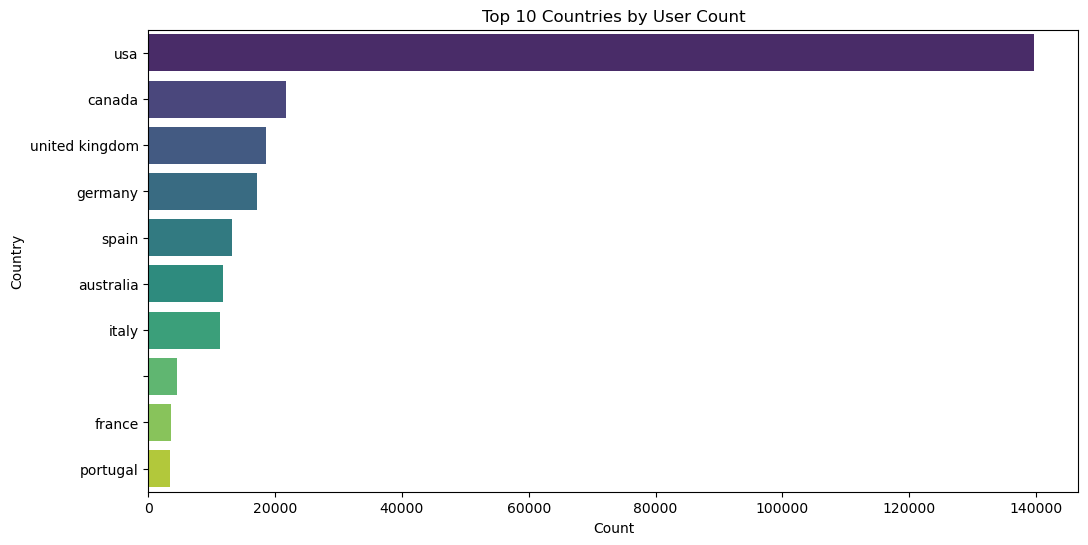

In [47]:
# Plot top 10 countries by user count
plt.figure(figsize=(12, 6))
sns.countplot(y='Country', data=user_data, order=user_data['Country'].value_counts().iloc[:10].index, palette='viridis')
plt.title('Top 10 Countries by User Count')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

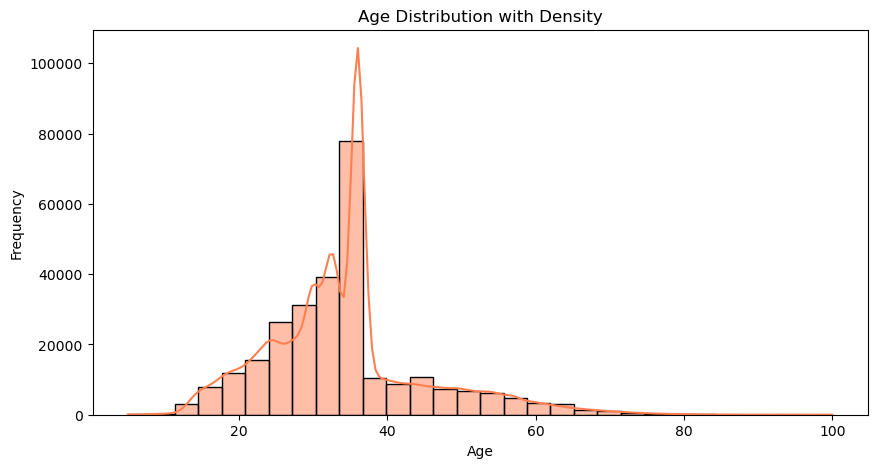

In [49]:
# Distribution plot for Age
plt.figure(figsize=(10, 5))
sns.histplot(user_data['Age'], kde=True, color='coral', bins=30)
plt.title('Age Distribution with Density')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [50]:
# Still we have 447 Nan values let's fill them with mean
user_data['Age'].fillna(user_data['Age'].median(), inplace=True)


In [53]:
user_data.isna().sum()

User-ID      0
Age          0
Country    368
dtype: int64

In [55]:
# Books Dataset
book_data.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [57]:
book_data.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


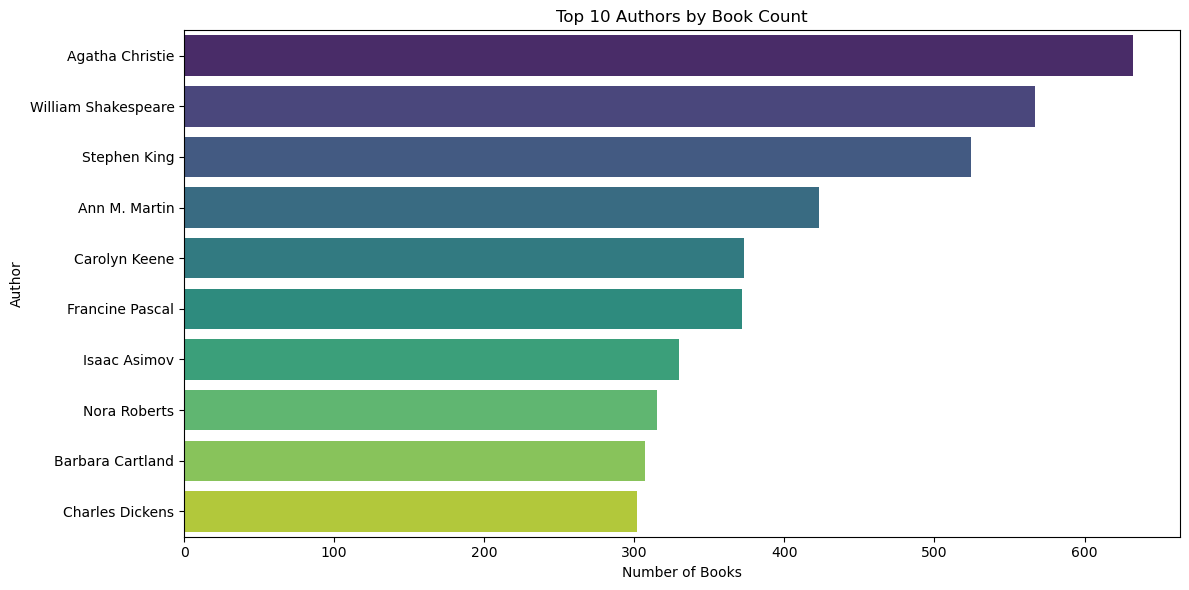

In [59]:
# Visualize Top 10 Authors
plt.figure(figsize=(12, 6))
top_authors = book_data['Book-Author'].value_counts().nlargest(10)
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title('Top 10 Authors by Book Count')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.tight_layout()
plt.show()

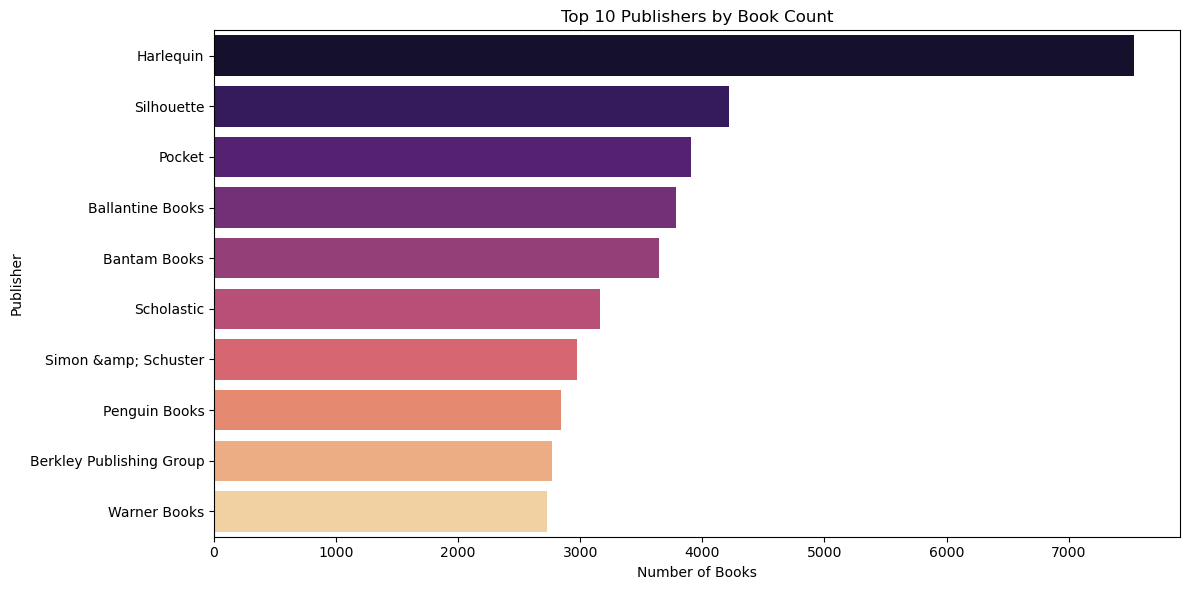

In [61]:
# Visualize Top 10 Publishers
plt.figure(figsize=(12, 6))
top_publishers = book_data['Publisher'].value_counts().nlargest(10)
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='magma')
plt.title('Top 10 Publishers by Book Count')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

In [63]:
# Converting 'Year-Of-Publication' to string and cleaning data
book_data['Year-Of-Publication'] = book_data['Year-Of-Publication'].astype(str)
book_data.loc[book_data['Year-Of-Publication'] == 'DK Publishing Inc', ['Year-Of-Publication', 'Book-Author', 'Publisher', 'Book-Title']] = [
    2000, "James Buckley", "DK Publishing Inc", "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"]
book_data.loc[book_data['Year-Of-Publication'] == 'Gallimard', ['Year-Of-Publication', 'Book-Author', 'Publisher', 'Book-Title']] = [
    2003, "Jean-Marie Gustave Le Clézio", "Gallimard", "Peuple du ciel, suivi de 'Les Bergers"]

In [65]:
# Converting 'Year-Of-Publication' to numeric and replacing invalid values
book_data['Year-Of-Publication'] = pd.to_numeric(book_data['Year-Of-Publication'], errors='coerce')
book_data.loc[(book_data['Year-Of-Publication'] > 2006) | (book_data['Year-Of-Publication'] == 0), 'Year-Of-Publication'] = np.nan
book_data['Year-Of-Publication'].fillna(round(book_data['Year-Of-Publication'].median()), inplace=True)


In [67]:
# Dropping unnecessary columns
book_data.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

In [69]:
# Handling missing values in 'Publisher' and 'Book-Author'
book_data['Publisher'].fillna('other', inplace=True)
book_data['Book-Author'].fillna('other', inplace=True)

In [71]:
# Print missing values
print("\nMissing Values after Processing:")
print(book_data.isnull().sum())


Missing Values after Processing:
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64


In [73]:
rating_data.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [75]:
# Just for checking
import os
print(os.path.exists('Books.csv'))

# Detailed file loading
try:
    book_data = pd.read_csv('Books.csv')
    print(book_data.shape)
    print(book_data.columns)
except Exception as e:
    print(f"Error loading file: {e}")

True
(271360, 8)
Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')


In [76]:
# Filter ratings to include only books present in the books dataset
ratings_new = rating_data[rating_data.ISBN.isin(book_data.ISBN)]
ratings_new = ratings_new[ratings_new['User-ID'].isin(user_data['User-ID'])]

In [78]:
def process_ratings_data(ratings, books, users):
    # Filter ratings based on existing books and users
    ratings_filtered = ratings[ratings.ISBN.isin(books.ISBN)]
    ratings_filtered = ratings_filtered[ratings_filtered['User-ID'].isin(users['User-ID'])]
    
    # Separate explicit and implicit ratings
    ratings_explicit = ratings_filtered[ratings_filtered['Book-Rating'] != 0].copy()
    ratings_implicit = ratings_filtered[ratings_filtered['Book-Rating'] == 0].copy()
    
    # Identify most rated books
    most_rated_isbns = ['0316666343', '0971880107', '0385504209', '0312195516', '0060928336']
    most_rated_books = pd.DataFrame(most_rated_isbns, columns=['ISBN'])
    most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN', how='inner')
    
    # Return only needed results
    return ratings_explicit, ratings_implicit, most_rated_books_summary, ratings_filtered

ratings_explicit, ratings_implicit, most_rated_books_summary, ratings_filtered = process_ratings_data(rating_data, book_data, user_data)


In [80]:
print("Shape of dataset before user filtering:", rating_data.shape)

Shape of dataset before user filtering: (1149780, 3)


In [83]:
print("Shape of dataset after user filtering:", ratings_filtered.shape)

Shape of dataset after user filtering: (1031136, 3)


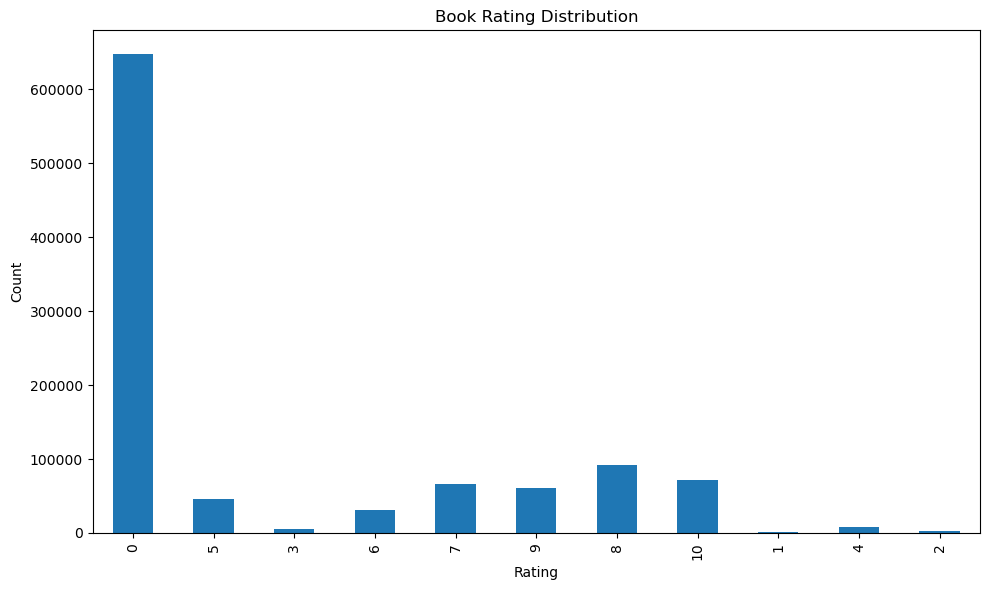

In [85]:
# Visualize overall rating distribution
plt.figure(figsize=(10, 6))
ratings_filtered['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Book Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [87]:
print('Explicit Ratings Dataset Shape:', ratings_explicit.shape)
print('Implicit Ratings Dataset Shape:', ratings_implicit.shape)

Explicit Ratings Dataset Shape: (383842, 3)
Implicit Ratings Dataset Shape: (647294, 3)


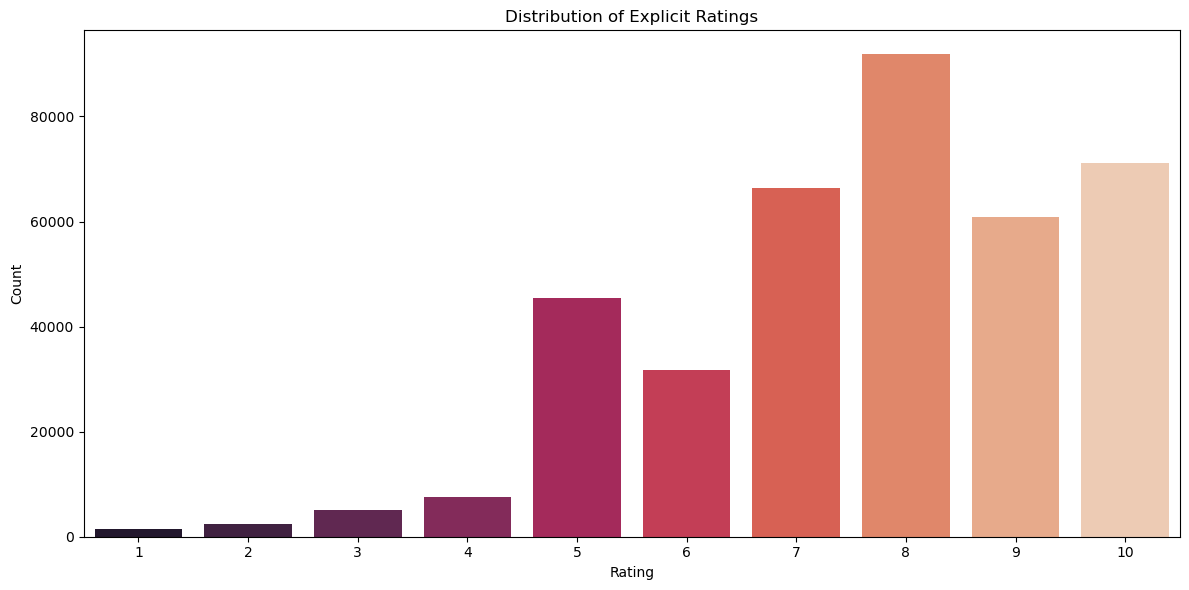

In [89]:
# Visualize explicit ratings distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=ratings_explicit, x='Book-Rating', palette='rocket')
plt.title('Distribution of Explicit Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [91]:
ratings_explicit, ratings_implicit, most_rated_books_summary, ratings_filtered = process_ratings_data(rating_data, book_data, user_data)

print("\nMost Rated Books Summary:")
print(most_rated_books_summary)

print("\nProcessed Ratings Data:")
ratings_explicit.head()


Most Rated Books Summary:
         ISBN                                       Book-Title    Book-Author  \
0  0316666343                        The Lovely Bones: A Novel   Alice Sebold   
1  0971880107                                      Wild Animus   Rich Shapero   
2  0385504209                                The Da Vinci Code      Dan Brown   
3  0312195516              The Red Tent (Bestselling Backlist)  Anita Diamant   
4  0060928336  Divine Secrets of the Ya-Ya Sisterhood: A Novel  Rebecca Wells   

  Year-Of-Publication      Publisher  \
0                2002  Little, Brown   
1                2004        Too Far   
2                2003      Doubleday   
3                1998    Picador USA   
4                1997      Perennial   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0316666343.0...   
1  http://images.amazon.com/images/P/0971880107.0...   
2  http://images.amazon.com/images/P/0385504209.0...   
3  http://images.amaz

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [93]:
# Create column Rating average 
ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
ratings_explicit['Total_No_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')

In [95]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


In [97]:
# Merge datasets to create Final_Dataset
Final_Dataset = user_data.copy()
Final_Dataset = pd.merge(Final_Dataset, ratings_explicit, on='User-ID', how='inner')
Final_Dataset = pd.merge(Final_Dataset, book_data, on='ISBN', how='inner')

In [99]:
# Correct function call
missing_summary = missing_values(Final_Dataset)

In [101]:
print("Missing Values Summary:")
print(missing_summary)

Missing Values Summary:
                                    Column  Missing Values  % of Total Values  \
Country                            Country            7176               1.87   
User-ID                            User-ID               0               0.00   
Age                                    Age               0               0.00   
ISBN                                  ISBN               0               0.00   
Book-Rating                    Book-Rating               0               0.00   
Avg_Rating                      Avg_Rating               0               0.00   
Total_No_Users_Rated  Total_No_Users_Rated               0               0.00   
Book-Title                      Book-Title               0               0.00   
Book-Author                    Book-Author               2               0.00   
Year-Of-Publication    Year-Of-Publication               0               0.00   
Publisher                        Publisher               2               0.00   
Imag

In [103]:
# Fill missing 'Country' with "Unknown"
Final_Dataset['Country'].fillna("Unknown", inplace=True)

# Fill missing 'Age' with the median age
Final_Dataset['Age'].fillna(Final_Dataset['Age'].median(), inplace=True)

# Check if all missing values are handled
print(Final_Dataset.isna().sum())


User-ID                 0
Age                     0
Country                 0
ISBN                    0
Book-Rating             0
Avg_Rating              0
Total_No_Users_Rated    0
Book-Title              0
Book-Author             2
Year-Of-Publication     0
Publisher               2
Image-URL-S             0
Image-URL-M             0
Image-URL-L             1
dtype: int64


In [105]:
Final_Dataset.columns


Index(['User-ID', 'Age', 'Country', 'ISBN', 'Book-Rating', 'Avg_Rating',
       'Total_No_Users_Rated', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

In [107]:
print(Final_Dataset[Final_Dataset['Avg_Rating'].isna()])


Empty DataFrame
Columns: [User-ID, Age, Country, ISBN, Book-Rating, Avg_Rating, Total_No_Users_Rated, Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, Image-URL-L]
Index: []


In [109]:
missing_values(Final_Dataset)

,Column,Missing Values,% of Total Values,Data Type
User-ID,User-ID,0,0.0,int64
Age,Age,0,0.0,float64
Country,Country,0,0.0,object
ISBN,ISBN,0,0.0,object
Book-Rating,Book-Rating,0,0.0,int64
Avg_Rating,Avg_Rating,0,0.0,float64
Total_No_Users_Rated,Total_No_Users_Rated,0,0.0,int64
Book-Title,Book-Title,0,0.0,object
Book-Author,Book-Author,2,0.0,object
Year-Of-Publication,Year-Of-Publication,0,0.0,object


In [111]:
Final_Dataset.shape

(383842, 14)

In [113]:
Final_Dataset.columns


Index(['User-ID', 'Age', 'Country', 'ISBN', 'Book-Rating', 'Avg_Rating',
       'Total_No_Users_Rated', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

In [115]:
# Calculate mean rating across all books (C) and 90th percentile of total ratings (m)
C = Final_Dataset['Avg_Rating'].mean()
m = Final_Dataset['Total_No_Users_Rated'].quantile(0.90)

In [117]:
# Filter books that meet the threshold
Top_Books = Final_Dataset.loc[Final_Dataset['Total_No_Users_Rated'] >= m]

In [119]:
print(f'C={C}, m={m}')
Top_Books.shape

C=7.626700569505161, m=64.0


(38570, 14)

In [121]:
# Define weighted rating function
def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Users_Rated']
    R = x['Avg_Rating']
    return (v / (v + m) * R) + (m / (m + v) * C)

In [123]:
# Apply weighted rating
Top_Books['Score'] = Top_Books.apply(weighted_rating, axis=1)

In [124]:
# Sort and keep unique entries
Top_Books = Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()

In [127]:
# Visualize top 20 books
cm = sns.light_palette('yellow', as_cmap=True)
Top_Books[['Book-Title', 'Total_No_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(20).style.background_gradient(cmap=cm)

,Book-Title,Total_No_Users_Rated,Avg_Rating,Score
0,"River, Cross My Heart",65,6.830769,7.225650
1,Lies and the Lying Liars Who Tell Them: A Fair and Balanced Look at the Right,65,8.615385,8.124875
2,Who Moved My Cheese? An Amazing Way to Deal with Change in Your Work and in Your Life,90,7.155556,7.351356
3,Fried Green Tomatoes at the Whistle Stop Cafe,86,8.593023,8.180726
4,Life of Pi,94,8.138298,7.931069
5,The Runaway Jury,152,7.743421,7.708837
6,Shopaholic Ties the Knot,68,7.897059,7.765976
7,From Potter's Field,98,7.704082,7.673511
8,The Perfect Storm : A True Story of Men Against the Sea,118,7.381356,7.467631
9,Kiss the Girls,81,7.864198,7.759371


In [129]:
pip install scikit-surprise


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [131]:
pip install --upgrade pip setuptools wheel


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------- ----------------- 1.0/1.8 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 7.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1
Note: you may need to restart the kernel to use updated packages.


In [133]:
import surprise
print(surprise.__version__)


1.1.4


In [135]:
# Import necessary libraries
from surprise import Dataset, Reader, SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [137]:
# Now you can rename the columns in `ratings_explicit`
ratings_explicit.rename(columns={'User-ID': 'user_id', 'ISBN': 'isbn', 'Book-Rating': 'book_rating'}, inplace=True)

In [139]:
# Filter users who have rated at least a threshold number of books
user_ratings_threshold = 3
filter_users = ratings_explicit['user_id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()
df_ratings_top = ratings_explicit[ratings_explicit['user_id'].isin(filter_users_list)]

In [141]:
print(f"Filter: users with at least {user_ratings_threshold} ratings")
print(f"Number of records: {len(df_ratings_top)}")

Filter: users with at least 3 ratings
Number of records: 327271


In [143]:
# Filter top 10% of most frequently rated books
book_ratings_threshold_perc = 0.1
book_ratings_threshold = len(df_ratings_top['isbn'].unique()) * book_ratings_threshold_perc
filter_books_list = df_ratings_top['isbn'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['isbn'].isin(filter_books_list)]

In [145]:
print(f"Filter: top {book_ratings_threshold_perc*100}% most frequently rated books")
print(f"Number of records: {len(df_ratings_top)}")

Filter: top 10.0% most frequently rated books
Number of records: 160787


In [147]:
# Prepare the dataset for Surprise
df = df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'book_rating']], reader)

In [149]:
# Train and evaluate SVD and NMF models
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
print("SVD Results:")
print(pd.DataFrame(cv_results_svd).mean())

model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
print("NMF Results:")
print(pd.DataFrame(cv_results_nmf).mean())

SVD Results:
test_rmse    1.601387
test_mae     1.239284
fit_time     3.747047
test_time    0.874744
dtype: float64
NMF Results:
test_rmse    2.627353
test_mae     2.243801
fit_time     9.822252
test_time    0.859007
dtype: float64


In [150]:
# GridSearch for SVD hyperparameter tuning
param_grid = {
    'n_factors': [80, 100],
    'n_epochs': [5, 20],
    'lr_all': [0.002, 0.005],
    'reg_all': [0.2, 0.4]
}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(f"Best RMSE Score: {gs.best_score['rmse']}")
print(f"Best Parameters: {gs.best_params['rmse']}")

Best RMSE Score: 1.5941044715017183
Best Parameters: {'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


In [153]:
# Detailed analysis of the best SVD model
trainset, testset = train_test_split(data, test_size=0.2)
best_model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
best_model.fit(trainset)
predictions = best_model.test(testset)

In [155]:
# Create predictions DataFrame
df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)

,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
20175,13995,0156767503,7.0,7.408191,False,7.0,0.408191
1343,261314,0061091316,5.0,6.819542,False,7.0,1.819542
29301,30906,0140132708,9.0,7.896260,False,8.0,1.103740
16929,17402,1551668998,10.0,8.252610,False,8.0,1.747390
10767,217318,0451208765,5.0,5.570993,False,6.0,0.570993


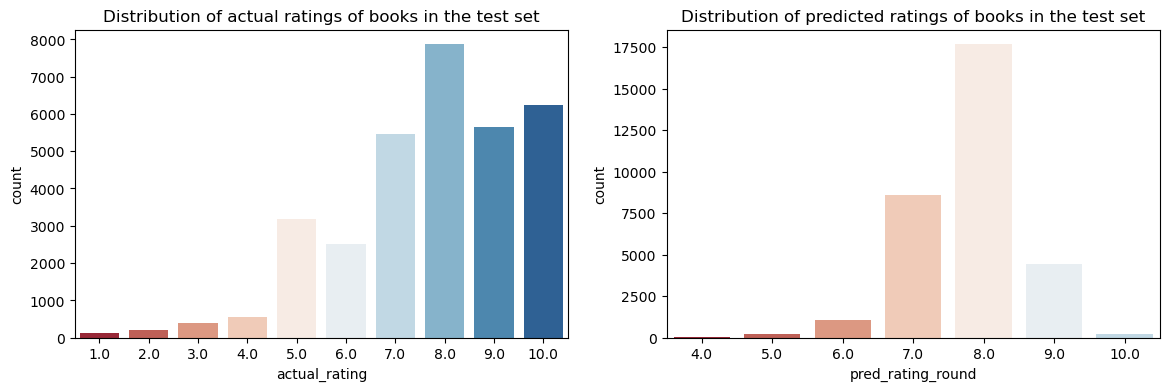

In [157]:
# Visualization of actual vs predicted ratings
palette = sns.color_palette("RdBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')

plt.show()

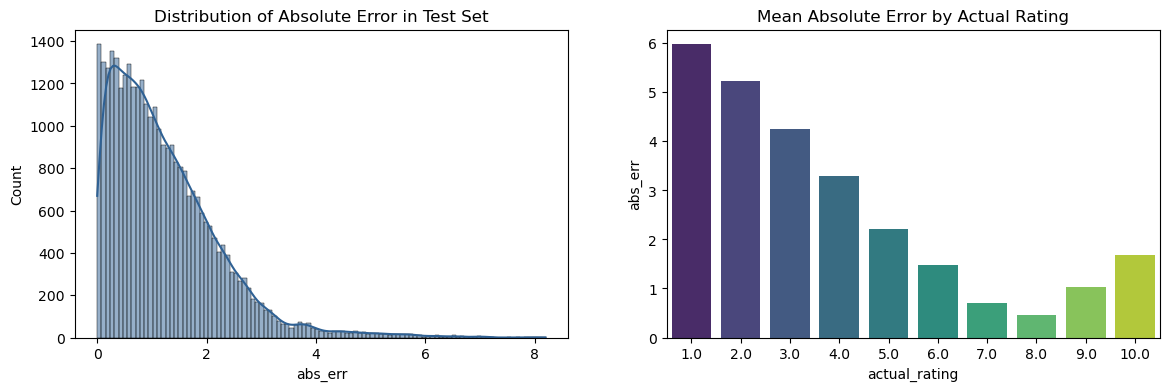

In [159]:
# Analyze the distribution of absolute errors
df_error_analysis = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

fig, (graph1, graph2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.histplot(df_pred['abs_err'], kde=True, color='#2f6194', ax=graph1)
graph1.set_title('Distribution of Absolute Error in Test Set')

sns.barplot(x='actual_rating', y='abs_err', data=df_error_analysis, palette='viridis', ax=graph2)
graph2.set_title('Mean Absolute Error by Actual Rating')

plt.show()

In [161]:
# Analyzing predictions for a specific user
specific_user_id = 193458
books_df = book_data.copy()
books_df.rename(columns={'ISBN': 'isbn', 'Book-Title': 'book_title'}, inplace=True)

extended_df = df.merge(books_df[['isbn', 'book_title']], on='isbn', how='left')
extended_df = extended_df.merge(df_pred[['isbn', 'user_id', 'pred_rating']], on=['isbn', 'user_id'], how='left')


In [163]:
# User-specific analysis
user_df = extended_df[extended_df['user_id'] == specific_user_id]

In [165]:
# Books rated >= 9 with no predictions
print(user_df[(user_df['pred_rating'].isna()) & (user_df['book_rating'] >= 9)].sample(10))

        user_id        isbn  book_rating  Avg_Rating  Total_No_Users_Rated  \
113592   193458  0330352695            9    7.615385                    13   
113578   193458  0064471063            9    8.518519                    27   
113587   193458  0142001740            9    8.452769                   307   
113583   193458  014011369X            9    9.125000                     8   
113593   193458  0345342569            9    7.947368                    19   
113580   193458  006447108X            9    8.833333                    18   
113581   193458  0064471098            9    8.733333                    15   
113599   193458  0345431057            9    9.125000                     8   
113615   193458  0553258001            9    8.236842                    38   
113594   193458  0345361792           10    8.607735                   181   

                                               book_title  pred_rating  
113592                               Four Letters of Love          N

In [167]:
# Predicted top-rated books for the user
print(user_df[user_df['pred_rating'].notna()].sort_values('pred_rating', ascending=False).head(5))

        user_id        isbn  book_rating  Avg_Rating  Total_No_Users_Rated  \
113611   193458  0451169530            8    8.485714                    70   
113577   193458  0064471055            9    8.545455                    22   
113579   193458  0064471071            9    8.733333                    15   
113630   193458  1853260169           10    8.153846                    13   
113626   193458  1559703237            7    8.000000                     4   

                                               book_title  pred_rating  
113611                      The Stand: Complete and Uncut     8.412350  
113577  Prince Caspian (rack) : The Return to Narnia (...     8.369509  
113579     The Voyage of the Dawn Treader (rack) (Narnia)     8.311948  
113630        Sense and Sensibility (Wordsworth Classics)     8.088793  
113626                         Trying to Save Piggy Sneed     8.072592  


In [169]:
# Actual top-rated books for the user
print(user_df[user_df['pred_rating'].notna()].sort_values('book_rating', ascending=False).head(5))

        user_id        isbn  book_rating  Avg_Rating  Total_No_Users_Rated  \
113630   193458  1853260169           10    8.153846                    13   
113577   193458  0064471055            9    8.545455                    22   
113579   193458  0064471071            9    8.733333                    15   
113585   193458  0140620125            9    8.133333                    15   
113620   193458  0679429220            9    7.794393                   107   

                                               book_title  pred_rating  
113630        Sense and Sensibility (Wordsworth Classics)     8.088793  
113577  Prince Caspian (rack) : The Return to Narnia (...     8.369509  
113579     The Voyage of the Dawn Treader (rack) (Narnia)     8.311948  
113585       Wuthering Heights (Penguin Popular Classics)     7.747234  
113620  Midnight in the Garden of Good and Evil: A Sav...     7.840695  


In [171]:
# Collaborative Filtering Recommendation System (Item-Item Based)
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
from scipy.sparse import csr_matrix

In [173]:
# Preparing the ratings matrix
renamed_ratings = df_ratings_top.rename(columns={'user_id': 'userID', 'isbn': 'ISBN', 'book_rating': 'bookRating'})
ratings_matrix_cf = renamed_ratings.pivot(index='userID', columns='ISBN', values='bookRating')

ratings_matrix_cf.fillna(0, inplace=True)
ratings_matrix_cf = ratings_matrix_cf.astype(np.int32)

In [175]:
# Sparsity calculation
total_users = ratings_matrix_cf.shape[0]
total_books = ratings_matrix_cf.shape[1]
sparsity_level = 1.0 - len(ratings_explicit) / float(total_users * total_books)
print(f'The sparsity level of the dataset is {sparsity_level * 100:.2f}%')

The sparsity level of the dataset is 99.85%


In [177]:
rating_data.columns
book_data.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [179]:
# Rename 'isbn' to 'ISBN' in book_data
book_data.rename(columns={'isbn': 'ISBN'}, inplace=True)

# Merge the DataFrames
merged_ratings = pd.merge(
    rating_data,
    book_data[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']],
    on='ISBN',
    how='inner'
)

# Drop unnecessary columns and rename
merged_ratings.drop(['Book-Author', 'Year-Of-Publication', 'Publisher'], axis=1, inplace=True)
merged_ratings.rename(columns={'User-ID': 'userID', 'Book-Rating': 'bookRating', 'Book-Title': 'bookTitle'}, inplace=True)


In [181]:
books_df.columns


Index(['isbn', 'book_title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [183]:
# Count ratings per book
book_rating_counts = (
    merged_ratings
    .groupby('bookTitle')['bookRating']
    .count()
    .reset_index()
    .rename(columns={'bookRating': 'TotalRatingCount'})
)

In [185]:
# Filter popular books
rating_with_counts = merged_ratings.merge(book_rating_counts, on='bookTitle', how='inner')
threshold = 50
popular_books = rating_with_counts.query('TotalRatingCount >= @threshold')

In [187]:
# Remove duplicates
if not popular_books.duplicated(['userID', 'bookTitle']).empty:
    initial_shape = popular_books.shape[0]
    popular_books = popular_books.drop_duplicates(['userID', 'bookTitle'])
    new_shape = popular_books.shape[0]
    print(f'Removed {initial_shape - new_shape} duplicate rows.')

Removed 3222 duplicate rows.


In [189]:
# Create a pivot table
book_user_pivot = popular_books.pivot(index='bookTitle', columns='userID', values='bookRating').fillna(0)
user_book_sparse_matrix = csr_matrix(book_user_pivot.values)

In [190]:
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import math

In [193]:
# Initializing Nearest Neighbors Model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(user_book_sparse_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [195]:
# Making Recommendations
query_index = np.random.choice(book_user_pivot.shape[0])
distances, indices = model_knn.kneighbors(book_user_pivot.iloc[query_index, :].values.reshape((1, -1)), n_neighbors=6)

for i in range(len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(book_user_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, book_user_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Secret Garden:

1: Harriet the Spy, with distance of 0.8512487599686425:
2: That Camden Summer, with distance of 0.8644850109114937:
3: Hamlet, with distance of 0.8685128650669866:
4: Melody (Logan), with distance of 0.8806443280510576:
5: The Lion, the Witch, and the Wardrobe (The Chronicles of Narnia, Book 2), with distance of 0.8809723526386445:


In [197]:
# Creating pivot table
book_user_pivot2 = popular_books.pivot(index='userID', columns='bookTitle', values='bookRating').fillna(0)

In [199]:
# Performing SVD
X = book_user_pivot2.values.T
SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)

In [201]:
# Computing Correlation
corr = np.corrcoef(matrix)

In [203]:
# Finding Similar Books
us_canada_book_title = book_user_pivot2.columns
us_canada_book_list = list(us_canada_book_title)
coffey_hands = us_canada_book_list.index("Harry Potter and the Sorcerer's Stone (Book 1)")
corr_coffey_hands = corr[coffey_hands]
list(us_canada_book_title[(corr_coffey_hands < 1.0) & (corr_coffey_hands > 0.9)])

['Harry Potter and the Chamber of Secrets (Book 2)',
 'Harry Potter and the Goblet of Fire (Book 4)',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'Harry Potter and the Prisoner of Azkaban (Book 3)',
 "Harry Potter and the Sorcerer's Stone (Book 1)",
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"]

In [205]:
# Collaborative Filtering
ratings_explicit.rename(columns={'user_id': 'User-ID', 'isbn': 'ISBN', 'book_rating': 'Book-Rating'}, inplace=True)
users_interactions_count_df = ratings_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]

interactions_from_selected_users_df = ratings_explicit.merge(users_with_enough_interactions_df, how='right', left_on='User-ID', right_on='User-ID')

def smooth_user_preference(x):
    return math.log(1 + x, 2)

interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()

In [207]:
# Splitting Data
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df, stratify=interactions_full_df['User-ID'], test_size=0.20, random_state=42)

In [209]:
# Creating Sparse Matrix
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_ids = list(users_items_pivot_matrix_df.index)

In [211]:
# Performing Matrix Factorization
NUMBER_OF_FACTORS_MF = 15
U, sigma, Vt = svds(users_items_pivot_matrix, k=NUMBER_OF_FACTORS_MF)
sigma = np.diag(sigma)

In [213]:
# Reconstructing the Matrix
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns=users_items_pivot_matrix_df.columns, index=users_ids).transpose()

book_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [215]:
# Class for Collaborative Filtering Recommendation
class CFRecommender:
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Sort user predictions in descending order
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})
        # Filter out items to ignore and get top recommendations
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending=False).head(topn)
        recommendations_df = recommendations_df.merge(book_data, on='ISBN', how='inner')
        recommendations_df = recommendations_df[['ISBN', 'Book-Title', 'recStrength']]
        return recommendations_df

In [217]:
# Instantiate the CF Recommender model
cf_recommender_model = CFRecommender(cf_preds_df)


In [219]:
# Indexing interaction data for quick access
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [221]:
# Function to get items a user has interacted with
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [223]:
# Class for model-based recommendation
class ModelRecommender:
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items
        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)
    
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
        try:
            index = next(i for i, c in enumerate(recommended_items) if c == item_id)
        except:
            index = -1
        hit = int(index in range(0, topn))
        return hit, index
    
    def evaluate_model_for_user(self, model, person_id):
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
        
        interacted_items_count_testset = len(person_interacted_items_testset) 
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df), topn=10000000000)
        print('Recommendation for User-ID = ', person_id)
        print(person_recs_df.head(10))
    
    def recommend_book(self, model, userid):
        self.evaluate_model_for_user(model, userid)
        return

In [225]:
# Instantiate the model recommender
model_recommender = ModelRecommender()

In [227]:
# Prompt user for input and recommend books
print(list(interactions_full_indexed_df.index.values))
user = int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model, user)

[171118, 23902, 23902, 23902, 23902, 166596, 23902, 109901, 189835, 189835, 85526, 93047, 95359, 56399, 229329, 11676, 69078, 63714, 101606, 11676, 36907, 85526, 26583, 120565, 101606, 11676, 193560, 262998, 23902, 63714, 11676, 159506, 189835, 11676, 180651, 63714, 193560, 274301, 120565, 30511, 189334, 189334, 275970, 166596, 23902, 6242, 101606, 101851, 11676, 95010, 11676, 37712, 123883, 94853, 23902, 23902, 11676, 189334, 11676, 11676, 149908, 30511, 94853, 225087, 172742, 120565, 16634, 88733, 218552, 264321, 189334, 56271, 11676, 63714, 6543, 30511, 134434, 76626, 240543, 26583, 248718, 76626, 56399, 270713, 168245, 168245, 98758, 23902, 63714, 107784, 37644, 37644, 168245, 164096, 35859, 177458, 136010, 197659, 23902, 11676, 11676, 23902, 78973, 200226, 30810, 11676, 242006, 225087, 11676, 274301, 11676, 30511, 193560, 189835, 39281, 120565, 11676, 183958, 11676, 148199, 23902, 109955, 76626, 193560, 148258, 11676, 63714, 85526, 109955, 23902, 225232, 148258, 189334, 105517, 62

Enter User ID from above list for book recommendation   23902


Recommendation for User-ID =  23902
         ISBN                                         Book-Title  recStrength
0  0446310786                              To Kill a Mockingbird     0.269610
1  0156027321                                         Life of Pi     0.151144
2  0312195516                The Red Tent (Bestselling Backlist)     0.148766
3  0156628708                                       Mrs Dalloway     0.139082
4  1573229725                                        Fingersmith     0.120793
5  0060958022                        Five Quarters of the Orange     0.119868
6  014029628X                              Girl in Hyacinth Blue     0.117677
7  0140298479                  Bridget Jones: The Edge of Reason     0.116530
8  038542017X  Like Water for Chocolate : A Novel in Monthly ...     0.115535
9  0374129983                                    The Corrections     0.110509


In [229]:
# Constant for evaluation
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

In [231]:
# Class for model evaluation
class ModelEvaluator:
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items
        random.seed(seed)
        non_interacted_items_sample = random.sample(list(non_interacted_items), sample_size)
        return set(non_interacted_items_sample)
    
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
        try:
            index = next(i for i, c in enumerate(recommended_items) if c == item_id)
        except:
            index = -1
        hit = int(index in range(0, topn))
        return hit, index
    
    def evaluate_model_for_user(self, model, person_id):
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
        
        interacted_items_count_testset = len(person_interacted_items_testset) 
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df), topn=10)
        
        tp = 0  # True Positives
        fp = 0  # False Positives
        fn = 0  # False Negatives
        
        recommended_items = set(person_recs_df['ISBN'].values)
        for item in recommended_items:
            if item in person_interacted_items_testset:
                tp += 1
            else:
                fp += 1
        
        fn = len(person_interacted_items_testset - recommended_items)
        
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
        # Compute hits@5 and hits@10
        hits_at_5_count = 0
        hits_at_10_count = 0
        
        for item_id in person_interacted_items_testset:
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10
        
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)
        
        return {
            'precision': precision,
            'recall': recall,
            'f1_score': f1_score,
            'hits@5_count': hits_at_5_count,
            'hits@10_count': hits_at_10_count,
            'recall@5': recall_at_5,
            'recall@10': recall_at_10,
            'interacted_count': interacted_items_count_testset
        }
    
    # Modify the `evaluate_model` method to include F1 score
    def evaluate_model(self, model):
        people_metrics = []
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
        print('%d users processed' % (idx + 1 if people_metrics else 0))
        
        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        # Calculate global recall@5, recall@10, and F1 score
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        # F1 score calculation at global level (average of individual F1 scores)
        global_f1_score = detailed_results_df['f1_score'].mean()
        
        # Store global metrics including F1 score
        global_metrics = {
            'modelName': model.get_model_name(),
            'recall@5': global_recall_at_5,
            'recall@10': global_recall_at_10,
            'global_f1_score': global_f1_score  # Add F1 score to global metrics
        }
        
        return global_metrics, detailed_results_df
    

In [233]:
# Instantiate and evaluate the model
model_evaluator = ModelEvaluator()
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)
print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
449 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.004647785039941903, 'recall@10': 0.004647785039941903, 'global_f1_score': 0.008457232980986565}


,precision,recall,f1_score,hits@5_count,hits@10_count,recall@5,recall@10,interacted_count,User-ID
10,0.2,0.001440,0.002859,2,2,0.001440,0.001440,1389,11676
31,0.6,0.005272,0.010453,6,6,0.005272,0.005272,1138,98391
45,0.3,0.007895,0.015385,3,3,0.007895,0.007895,380,189835
30,0.1,0.002710,0.005277,1,1,0.002710,0.002710,369,153662
70,0.3,0.012712,0.024390,3,3,0.012712,0.012712,236,23902
7,0.0,0.000000,0.000000,0,0,0.000000,0.000000,204,235105
47,0.0,0.000000,0.000000,0,0,0.000000,0.000000,203,76499
50,0.1,0.005181,0.009852,1,1,0.005181,0.005181,193,171118
42,0.2,0.010417,0.019802,2,2,0.010417,0.010417,192,16795
43,0.0,0.000000,0.000000,0,0,0.000000,0.000000,188,248718
